**Accenture**

Accenture plc is a Global multinational professional services company that specialises in IT services and consulting. A Fortune Global 500 company, it reported revenues of $44.33 billion in 2020 and had 569,000 employees. In 2015, the company had about 150,000 employees in India, 48,000 in the US, and 50,000 in the Philippines. Accenture's current clients include 91 of the Fortune Global 100 and more than three-quarters of the Fortune Global 500.

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/kalilurrahman/accenture-stock-price-all-time?select=Accenture_stock_history.csv

In [2]:
#https://drive.google.com/file/d/1GLmK-cNRgTN8mNc3Shr76ruu5LgD7IzA/view?usp=sharing

!gdown 1GLmK-cNRgTN8mNc3Shr76ruu5LgD7IzA

Downloading...
From: https://drive.google.com/uc?id=1GLmK-cNRgTN8mNc3Shr76ruu5LgD7IzA
To: /content/Accenture_stock_history.csv
100% 502k/502k [00:00<00:00, 147MB/s]


Mengimport datasets Accenture

In [4]:
train_data = pd.read_csv('Accenture_stock_history.csv')
train_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2001-07-19,11.234038,11.375393,11.159640,11.286116,34994300,0.0,0
1,2001-07-20,11.196839,11.196839,11.010845,11.167080,9238500,0.0,0
2,2001-07-23,11.159637,11.167077,10.824848,11.159637,7501000,0.0,0
3,2001-07-24,11.122439,11.137319,10.936445,11.055481,3537300,0.0,0
4,2001-07-25,10.936445,11.122439,10.899246,11.122439,4208100,0.0,0


Berisikan rincian data pada datasets yaang dipakai
Data date time digunakan sebagai forecasting
Data open, high, low, close, dan volume merupakan fitur terkait harga jual barang

Check missing values

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5082 non-null   object 
 1   Open          5082 non-null   float64
 2   High          5082 non-null   float64
 3   Low           5082 non-null   float64
 4   Close         5082 non-null   float64
 5   Volume        5082 non-null   int64  
 6   Dividends     5082 non-null   float64
 7   Stock Splits  5082 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 317.8+ KB


Pengecekan apakah ada missing value berdasarkan panjang data

Check statistic vales for every features

In [6]:
train_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5082.000000,5082.000000,5082.000000,5082.000000,5.082000e+03,5082.000000,5082.0
mean,74.854864,75.536654,74.214846,74.918059,2.954039e+06,0.005389,0.0
std,70.934675,71.463018,70.422156,70.953071,2.608493e+06,0.072137,0.0
min,8.481324,9.121145,8.406926,8.816115,1.811000e+05,0.000000,0.0
25%,22.230564,22.638424,21.947345,22.346736,1.815850e+06,0.000000,0.0
50%,45.823045,46.408159,45.417967,45.787195,2.428350e+06,0.000000,0.0
75%,106.989943,107.688098,106.465280,107.035688,3.454825e+06,0.000000,0.0
max,345.000000,345.519989,341.500000,344.429993,8.965590e+07,1.460000,0.0


Mengecek statistical values berupa mean, median, nilai maksimul, nilai minimum, dll

Handle datetime data for time series

In [7]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2001-07-19,11.234038,11.375393,11.159640,11.286116,34994300,0.0,0
2001-07-20,11.196839,11.196839,11.010845,11.167080,9238500,0.0,0
2001-07-23,11.159637,11.167077,10.824848,11.159637,7501000,0.0,0
2001-07-24,11.122439,11.137319,10.936445,11.055481,3537300,0.0,0
2001-07-25,10.936445,11.122439,10.899246,11.122439,4208100,0.0,0


**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

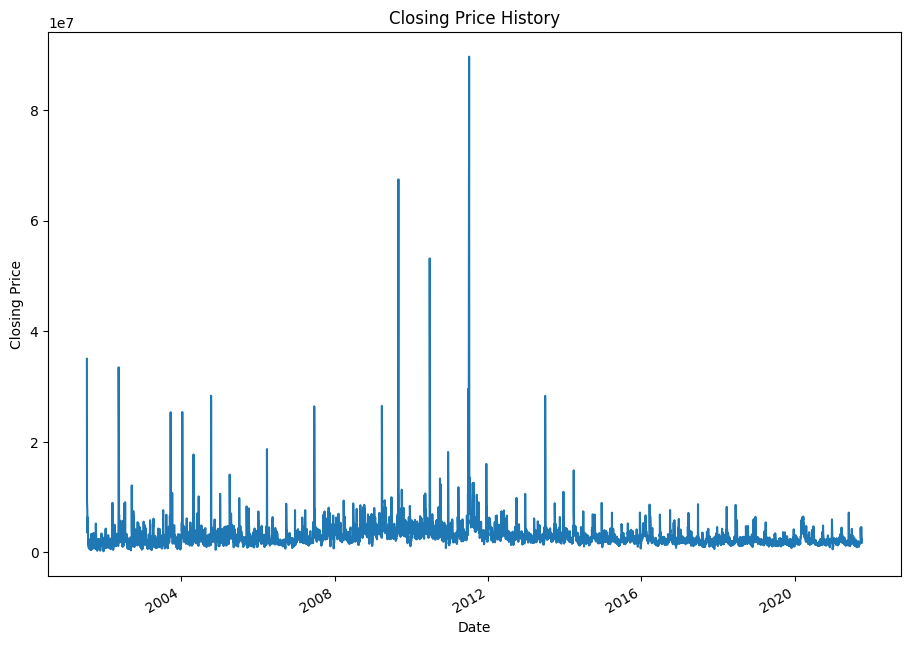

In [9]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Volume'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

<Figure size 1600x800 with 0 Axes>

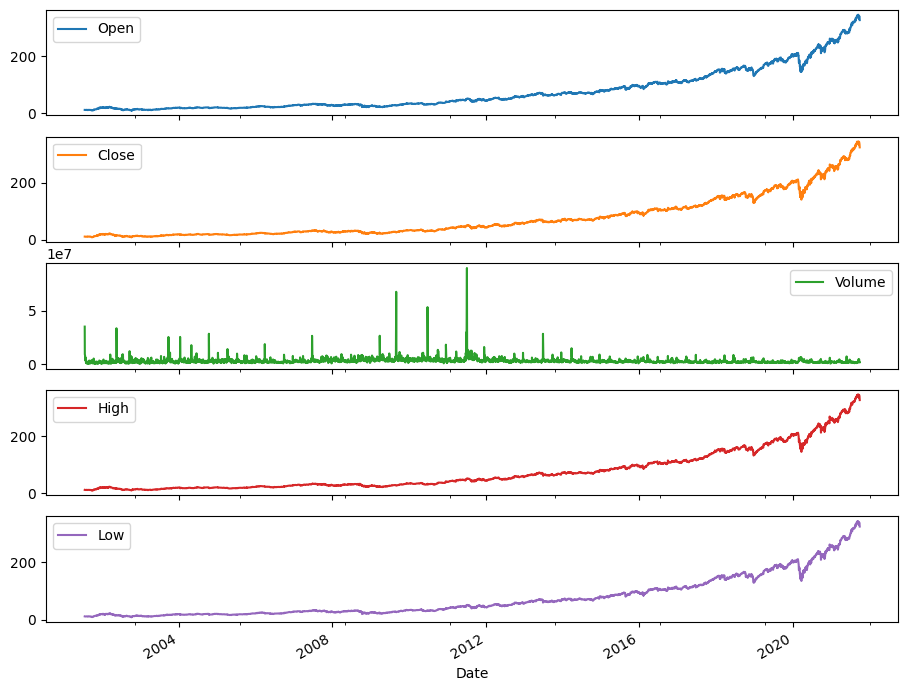

In [10]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

In [11]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

In [12]:
df = train_data[['HL_PCT', 'PCT_change','Volume']]

In [13]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Volume'].shift(-forecast_out)

255


<ipython-input-13-2c2e01fe4182>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Volume'].shift(-forecast_out)


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [15]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-15-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


In [16]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [17]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-17-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [20]:
lr_confidence

0.03029500566144716

In [21]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [22]:
rf_confidence

-0.06791463121361319

In [23]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-23-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-23-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-23-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

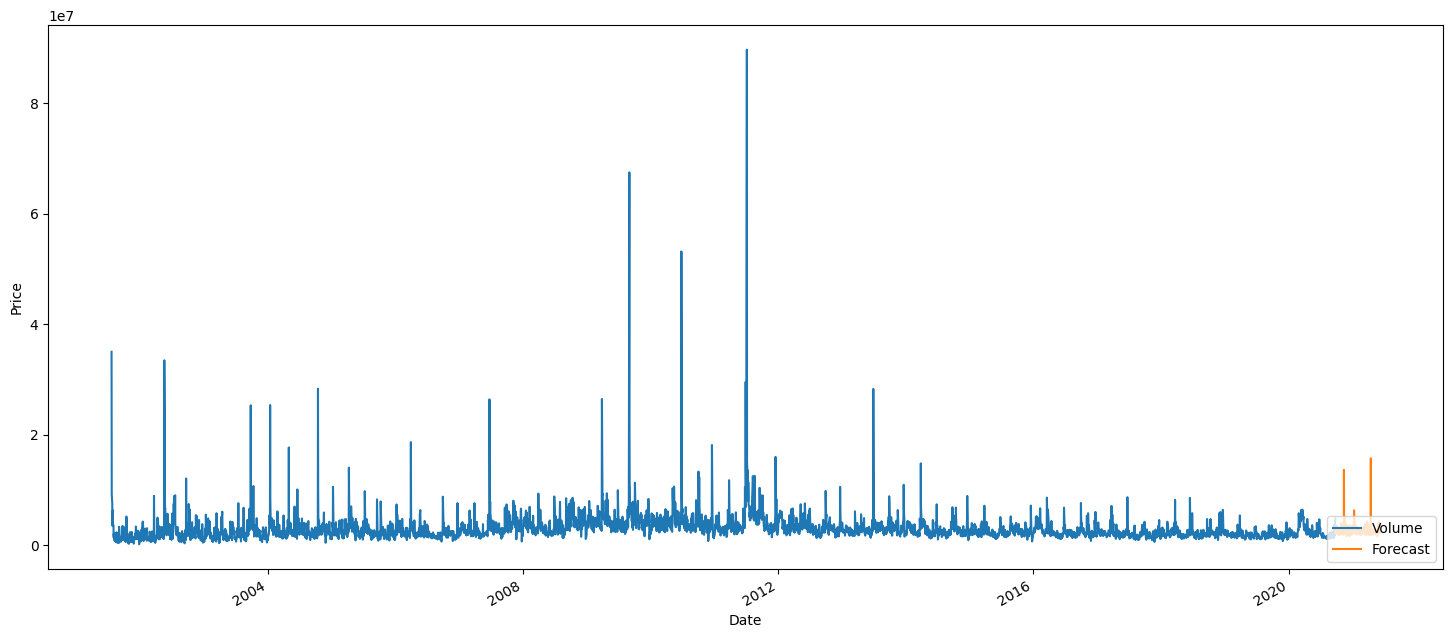

In [25]:
plt.figure(figsize=(18, 8))
df['Volume'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Prediksi digambarkan dengan grafik berwarna oren